**connect to the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Traffic_Monetoring/


/content/drive/.shortcut-targets-by-id/1WXSeespLo6J9ZRcWwHOUYEhPj8ProJQu/Traffic_Monetoring


## **2.model training**
### importing libraries

In [3]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
import pathlib
import random
import shutil
import sys
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import torch
import ultralytics
import yaml
from IPython import display
from PIL import Image
from tqdm.notebook import tqdm
from ultralytics import YOLO




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", plt.matplotlib.__version__)
print("pandas version:", pd.__version__)
print("PIL version:", Image.__version__)
print("PyYAML version:", yaml.__version__)
print("torch version:", torch.__version__)
print("ultralytics version:", ultralytics.__version__)

Platform: linux
Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
---
matplotlib version: 3.10.0
pandas version: 2.2.2
PIL version: 11.2.1
PyYAML version: 6.0.2
torch version: 2.6.0+cu124
ultralytics version: 8.3.133


In [6]:
#establish the device
if torch.cuda.is_available():
    device = "cuda"
else :
    device ="cpu"

print(f"Using {device} device.")

Using cuda device.


In [7]:
classes = [
    "ambulance",
    "army vehicle",
    "auto rickshaw",
    "bicycle",
    "bus",
    "car",
    "garbagevan",
    "human hauler",
    "minibus",
    "minivan",
    "motorbike",
    "pickup",
    "policecar",
    "rickshaw",
    "scooter",
    "suv",
    "taxi",
    "three wheelers (CNG)",
    "truck",
    "van",
    "wheelbarrow",
]
class_mapping = {name:idx for idx,name in enumerate(classes)}

print(class_mapping)

{'ambulance': 0, 'army vehicle': 1, 'auto rickshaw': 2, 'bicycle': 3, 'bus': 4, 'car': 5, 'garbagevan': 6, 'human hauler': 7, 'minibus': 8, 'minivan': 9, 'motorbike': 10, 'pickup': 11, 'policecar': 12, 'rickshaw': 13, 'scooter': 14, 'suv': 15, 'taxi': 16, 'three wheelers (CNG)': 17, 'truck': 18, 'van': 19, 'wheelbarrow': 20}


### writing yaml file

In [8]:
yolo_base = Path("/content/drive/MyDrive/Traffic_Monetoring/data_yolo")
metadata= {
    "path":str(yolo_base.absolute()),
    "train": "images/train",
    "val": "images/val",
    "names":classes,
    "nc":len(classes)
}

print (metadata)

{'path': '/content/drive/MyDrive/Traffic_Monetoring/data_yolo', 'train': 'images/train', 'val': 'images/val', 'names': ['ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers (CNG)', 'truck', 'van', 'wheelbarrow'], 'nc': 21}


In [9]:
yolo_config= "data.yaml"
yaml.safe_dump(metadata,open(yolo_config,"w"))

with open (yolo_config,"r") as f :
    for i in f :
        print (i.strip())




names:
- ambulance
- army vehicle
- auto rickshaw
- bicycle
- bus
- car
- garbagevan
- human hauler
- minibus
- minivan
- motorbike
- pickup
- policecar
- rickshaw
- scooter
- suv
- taxi
- three wheelers (CNG)
- truck
- van
- wheelbarrow
nc: 21
path: /content/drive/MyDrive/Traffic_Monetoring/data_yolo
train: images/train
val: images/val


### model implementation

In [ ]:
model = YOLO("../model/yolov8m.pt")

print(model)

100%|██████████| 49.7M/49.7M [00:00<00:00, 191MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

### model training

In [ ]:
results = model.train(
    # Core Training Parameters
    data="data.yaml",
    epochs=100,
    batch=16,          # Optimal for T4 GPU
    imgsz=640,
    workers=4,         # Optimal for Colab (2 CPU cores)

    # Learning Rate Schedule
    lr0=0.01,         # Initial learning rate (higher for v8x)
    lrf=0.0001,         # Final learning rate (10x lower than lr0)
    warmup_epochs=3,  # Gradual learning rate increase

    # Automatic Augmentations (Light Modifications)
    augment=True,     # Keeps YOLO's default augmentations
    degrees=0.0,      # Disables rotation (better for vehicles)
    flipud=0.0,       # Disables vertical flip

    # Advanced Settings
    optimizer='Adam', # More stable than AdamW for object detection
    weight_decay=0.0005,
    amp=True,

    patience=10,      # Longer wait before early stopping

    # Output
    project="traffic_monitoring",
    name="yolov8m_run",
    exist_ok=True
)

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.0001, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=../model/yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

train: Scanning /content/drive/MyDrive/Traffic_Monetoring/data_yolo/labels/train.cache... 2403 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2403/2403 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.9 ms, read: 34.2±23.4 MB/s, size: 90.2 KB)


val: Scanning /content/drive/MyDrive/Traffic_Monetoring/data_yolo/labels/val.cache... 597 images, 0 backgrounds, 0 corrupt: 100%|██████████| 597/597 [00:00<?, ?it/s]


Plotting labels to traffic_monitoring/yolov8m_run/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to traffic_monitoring/yolov8m_run
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        14G      1.718      2.524      1.509         36        640: 100%|██████████| 151/151 [01:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.76it/s]


                   all        597       5024      0.201     0.0752    0.00933    0.00459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.18G      1.779      2.374      1.571         73        640: 100%|██████████| 151/151 [01:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.56it/s]


                   all        597       5024      0.308      0.058     0.0421     0.0218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.21G      1.708       2.24      1.536         42        640: 100%|██████████| 151/151 [01:31<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.75it/s]

                   all        597       5024      0.439     0.0968     0.0883     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.58G      1.653      2.099      1.497         62        640: 100%|██████████| 151/151 [01:31<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.79it/s]

                   all        597       5024      0.448       0.13     0.0881     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.05G      1.608      1.989      1.469         51        640: 100%|██████████| 151/151 [01:27<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        597       5024      0.593      0.138      0.149     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.15G      1.567      1.927      1.443         17        640: 100%|██████████| 151/151 [01:31<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.80it/s]


                   all        597       5024      0.504      0.167       0.16     0.0916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.11G      1.534      1.877      1.433         38        640: 100%|██████████| 151/151 [01:31<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.72it/s]

                   all        597       5024      0.572      0.163      0.177      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.91G      1.516      1.779      1.401         36        640: 100%|██████████| 151/151 [01:31<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]


                   all        597       5024      0.547      0.184      0.171     0.0932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.05G      1.495      1.781      1.399         55        640: 100%|██████████| 151/151 [01:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]


                   all        597       5024      0.443      0.205      0.174     0.0983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.17G      1.483      1.733      1.397         34        640: 100%|██████████| 151/151 [01:27<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.74it/s]

                   all        597       5024      0.536      0.177      0.177     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.71G       1.46      1.694      1.375         68        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.78it/s]


                   all        597       5024      0.552       0.19      0.194       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.16G      1.459      1.686       1.37         39        640: 100%|██████████| 151/151 [01:31<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        597       5024      0.535      0.211      0.208       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.96G      1.435      1.632      1.357         21        640: 100%|██████████| 151/151 [01:31<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.85it/s]


                   all        597       5024      0.466      0.252      0.235      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       8.3G      1.417      1.601      1.351         43        640: 100%|██████████| 151/151 [01:30<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]

                   all        597       5024      0.496      0.234      0.228      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.41G       1.42      1.613      1.345         40        640: 100%|██████████| 151/151 [01:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.80it/s]

                   all        597       5024      0.424      0.256      0.234       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.64G      1.412      1.582      1.341         46        640: 100%|██████████| 151/151 [01:27<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.78it/s]

                   all        597       5024      0.468      0.228      0.239      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.17G      1.402      1.574      1.333         64        640: 100%|██████████| 151/151 [01:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.90it/s]


                   all        597       5024      0.568      0.234      0.244      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.44G       1.39      1.532      1.329         35        640: 100%|██████████| 151/151 [01:27<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.78it/s]

                   all        597       5024      0.539       0.24      0.259      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.62G      1.387      1.555      1.328         85        640: 100%|██████████| 151/151 [01:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        597       5024      0.496      0.255      0.245      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.13G      1.364      1.501      1.308         35        640: 100%|██████████| 151/151 [01:27<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.79it/s]

                   all        597       5024       0.63      0.247      0.268      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.18G      1.369       1.49      1.311         37        640: 100%|██████████| 151/151 [01:33<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]

                   all        597       5024       0.58      0.246       0.27      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.62G      1.382      1.505      1.318         29        640: 100%|██████████| 151/151 [01:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.76it/s]

                   all        597       5024      0.528      0.279      0.272      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.95G      1.386      1.498      1.316         30        640: 100%|██████████| 151/151 [01:37<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.05it/s]

                   all        597       5024      0.598       0.26      0.278      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.52G      1.355       1.46      1.298         28        640: 100%|██████████| 151/151 [01:31<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.80it/s]

                   all        597       5024      0.512      0.298      0.293      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.33G      1.344      1.443      1.293         66        640: 100%|██████████| 151/151 [01:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.89it/s]


                   all        597       5024      0.509      0.277      0.265      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.14G      1.334      1.431      1.293         53        640: 100%|██████████| 151/151 [01:30<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.53it/s]

                   all        597       5024      0.528      0.269      0.261      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.46G      1.343      1.439        1.3         37        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        597       5024       0.61      0.294      0.305      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.44G      1.354      1.428      1.299         38        640: 100%|██████████| 151/151 [01:33<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.74it/s]

                   all        597       5024      0.541      0.298       0.28      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.04G      1.343      1.424      1.288         25        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]


                   all        597       5024      0.495      0.301      0.303      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.64G      1.333      1.381      1.276         44        640: 100%|██████████| 151/151 [01:31<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        597       5024      0.523      0.301      0.299      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       8.3G      1.324      1.378      1.276         10        640: 100%|██████████| 151/151 [01:27<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.80it/s]

                   all        597       5024       0.61      0.289      0.317      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       8.3G      1.336      1.386      1.285         34        640: 100%|██████████| 151/151 [01:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]

                   all        597       5024      0.548      0.286      0.298      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       8.3G      1.319      1.369       1.28         38        640: 100%|██████████| 151/151 [01:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024      0.622      0.295      0.319      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.43G      1.301      1.346       1.27         23        640: 100%|██████████| 151/151 [01:27<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024      0.612      0.288       0.32      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.26G        1.3      1.342       1.26         42        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.86it/s]

                   all        597       5024      0.626      0.299      0.332      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.97G      1.304      1.329      1.272         72        640: 100%|██████████| 151/151 [01:30<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024       0.52      0.337      0.326      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.54G      1.289      1.323      1.257         34        640: 100%|██████████| 151/151 [01:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]

                   all        597       5024      0.637      0.303      0.337      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.82G      1.278      1.303      1.251         52        640: 100%|██████████| 151/151 [01:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]


                   all        597       5024      0.626      0.316      0.327      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.43G        1.3      1.314      1.265         41        640: 100%|██████████| 151/151 [01:27<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.77it/s]

                   all        597       5024      0.602      0.326      0.344       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.21G      1.291      1.319      1.262        112        640: 100%|██████████| 151/151 [01:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.06it/s]


                   all        597       5024      0.503      0.313      0.332      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.53G      1.274      1.291      1.257         29        640: 100%|██████████| 151/151 [01:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.04it/s]


                   all        597       5024       0.57       0.31      0.334      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.76G      1.267      1.288      1.247         13        640: 100%|██████████| 151/151 [01:27<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.84it/s]

                   all        597       5024      0.677      0.303      0.341      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.14G      1.285      1.298      1.243         35        640: 100%|██████████| 151/151 [01:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.61it/s]


                   all        597       5024      0.649      0.296      0.324      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.28G      1.273      1.284      1.253         32        640: 100%|██████████| 151/151 [01:28<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.06it/s]

                   all        597       5024       0.62      0.309      0.328      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.08G      1.254      1.246      1.238         15        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.73it/s]

                   all        597       5024      0.548       0.35      0.341      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.06G      1.254      1.245      1.236         30        640: 100%|██████████| 151/151 [01:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024       0.68      0.323      0.361      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.23G      1.249      1.248      1.239         11        640: 100%|██████████| 151/151 [01:32<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]


                   all        597       5024      0.654      0.315      0.349      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.53G      1.245      1.244      1.229         37        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.16it/s]


                   all        597       5024      0.656      0.344      0.373       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.05G      1.229      1.218      1.225         40        640: 100%|██████████| 151/151 [01:28<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]


                   all        597       5024      0.683      0.324       0.37      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.32G      1.228      1.204      1.221         59        640: 100%|██████████| 151/151 [01:30<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        597       5024      0.674      0.334      0.364      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.12G      1.228      1.197      1.213         70        640: 100%|██████████| 151/151 [01:28<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        597       5024      0.637      0.309      0.347      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.12G      1.217      1.206      1.209         35        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.11it/s]

                   all        597       5024      0.693      0.319      0.361      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.31G      1.213      1.175      1.212         40        640: 100%|██████████| 151/151 [01:27<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        597       5024      0.619      0.357      0.381      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.35G      1.204      1.158      1.206         28        640: 100%|██████████| 151/151 [01:31<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.06it/s]

                   all        597       5024      0.589      0.341      0.371      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.43G        1.2      1.162      1.208         35        640: 100%|██████████| 151/151 [01:27<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]

                   all        597       5024      0.575      0.354      0.385      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.19G      1.192      1.146      1.198         36        640: 100%|██████████| 151/151 [01:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.63it/s]


                   all        597       5024      0.626      0.343      0.362      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.32G      1.206      1.171      1.213         27        640: 100%|██████████| 151/151 [01:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.95it/s]


                   all        597       5024      0.582      0.353       0.37      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.45G      1.209      1.158      1.209         37        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        597       5024      0.564      0.349      0.376      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.63G      1.198      1.141      1.196         43        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.08it/s]


                   all        597       5024      0.621      0.339      0.379      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.74G      1.192      1.115      1.194         46        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.13it/s]

                   all        597       5024      0.673      0.347      0.385      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.26G       1.18      1.106       1.19         22        640: 100%|██████████| 151/151 [01:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024      0.583      0.395      0.401      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.52G      1.197      1.128      1.197         31        640: 100%|██████████| 151/151 [01:31<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.15it/s]

                   all        597       5024      0.646      0.367      0.396      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.37G      1.174      1.098      1.185         41        640: 100%|██████████| 151/151 [01:27<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.09it/s]

                   all        597       5024      0.613      0.359      0.397      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.13G      1.166       1.09      1.181         43        640: 100%|██████████| 151/151 [01:31<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        597       5024      0.629       0.36      0.389      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.07G      1.166      1.082      1.182         22        640: 100%|██████████| 151/151 [01:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]

                   all        597       5024      0.674      0.335      0.379      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.21G      1.154      1.072      1.178         58        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024      0.694      0.348      0.393      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.18G      1.161      1.062      1.179         36        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]

                   all        597       5024      0.608      0.359      0.396      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.15G      1.153      1.063      1.166         32        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024      0.665       0.37      0.397      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.58G      1.142      1.043      1.166         42        640: 100%|██████████| 151/151 [01:30<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.91it/s]

                   all        597       5024      0.703      0.347        0.4      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.87G      1.127      1.019      1.155         23        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.85it/s]

                   all        597       5024       0.68      0.364      0.402      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.69G      1.134      1.017      1.156         41        640: 100%|██████████| 151/151 [01:30<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.90it/s]


                   all        597       5024      0.694      0.352      0.409      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.54G      1.135      1.012      1.161         28        640: 100%|██████████| 151/151 [01:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.88it/s]

                   all        597       5024      0.644      0.383      0.412      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.32G      1.127      1.008      1.156         37        640: 100%|██████████| 151/151 [01:29<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.06it/s]


                   all        597       5024        0.6      0.402      0.406      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.21G      1.117     0.9817      1.146         36        640: 100%|██████████| 151/151 [01:27<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.80it/s]

                   all        597       5024      0.661       0.38      0.422      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.38G      1.108     0.9861      1.146         60        640: 100%|██████████| 151/151 [01:30<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.15it/s]

                   all        597       5024      0.654      0.401      0.434      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.75G       1.11     0.9756      1.144         30        640: 100%|██████████| 151/151 [01:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.85it/s]

                   all        597       5024      0.609      0.379       0.42      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.27G      1.084     0.9504       1.13         20        640: 100%|██████████| 151/151 [01:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.89it/s]


                   all        597       5024      0.653      0.388       0.42       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.47G      1.107     0.9735       1.14         59        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.82it/s]

                   all        597       5024      0.679      0.374      0.419      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.22G      1.083     0.9301      1.134         50        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.86it/s]

                   all        597       5024      0.691      0.402      0.439      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.16G      1.083     0.9356      1.126         75        640: 100%|██████████| 151/151 [01:31<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024       0.58      0.419      0.419      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.79G      1.076     0.9224       1.13         37        640: 100%|██████████| 151/151 [01:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.90it/s]

                   all        597       5024      0.647      0.416      0.453       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       8.3G       1.07     0.9036      1.128        142        640: 100%|██████████| 151/151 [01:31<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.80it/s]

                   all        597       5024      0.646      0.405      0.446      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.39G       1.06     0.8905      1.112         67        640: 100%|██████████| 151/151 [01:30<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.12it/s]

                   all        597       5024      0.635        0.4      0.438      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.81G      1.048     0.8823      1.109         66        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]


                   all        597       5024      0.653      0.396      0.436      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.56G      1.048     0.8823      1.108         58        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.88it/s]

                   all        597       5024      0.698      0.396      0.455      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.92G      1.043     0.8638      1.108         24        640: 100%|██████████| 151/151 [01:28<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.92it/s]

                   all        597       5024      0.659        0.4      0.434      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.79G      1.032     0.8575        1.1         92        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.95it/s]

                   all        597       5024      0.647      0.409      0.451      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.21G      1.039     0.8449      1.102         40        640: 100%|██████████| 151/151 [01:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.92it/s]

                   all        597       5024      0.724      0.407       0.47      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.01G      1.018     0.8309      1.096         43        640: 100%|██████████| 151/151 [01:30<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.85it/s]

                   all        597       5024       0.73      0.402       0.46        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.16G      1.022     0.8348      1.096         30        640: 100%|██████████| 151/151 [01:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.94it/s]


                   all        597       5024      0.668       0.43      0.464      0.302
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.12G      1.026     0.7976      1.101         12        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.90it/s]

                   all        597       5024      0.671       0.43      0.456      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.23G     0.9978     0.7647       1.08         28        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.87it/s]

                   all        597       5024      0.623      0.442      0.465      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.27G     0.9973     0.7513      1.084         17        640: 100%|██████████| 151/151 [01:24<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.86it/s]

                   all        597       5024      0.659      0.439      0.466      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.84G     0.9852     0.7327      1.072         21        640: 100%|██████████| 151/151 [01:26<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.86it/s]

                   all        597       5024       0.67      0.424       0.47      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.12G     0.9698     0.7218      1.072          8        640: 100%|██████████| 151/151 [01:30<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.96it/s]


                   all        597       5024      0.676      0.434      0.469      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.08G     0.9648     0.7142      1.064         25        640: 100%|██████████| 151/151 [01:25<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.03it/s]

                   all        597       5024      0.689      0.432      0.473       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         8G     0.9587     0.7023      1.062         25        640: 100%|██████████| 151/151 [01:31<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        597       5024       0.67       0.43      0.476      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.82G     0.9446     0.6837      1.052         23        640: 100%|██████████| 151/151 [01:29<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.83it/s]

                   all        597       5024      0.661      0.436      0.476      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.79G     0.9448      0.678      1.053         18        640: 100%|██████████| 151/151 [01:33<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:10<00:00,  1.81it/s]

                   all        597       5024      0.667      0.434      0.477      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       8.1G     0.9364     0.6651      1.047         21        640: 100%|██████████| 151/151 [01:29<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

                   all        597       5024      0.666       0.44      0.484      0.319



100 epochs completed in 2.837 hours.
Optimizer stripped from traffic_monitoring/yolov8m_run/weights/last.pt, 52.0MB
Optimizer stripped from traffic_monitoring/yolov8m_run/weights/best.pt, 52.0MB

Validating traffic_monitoring/yolov8m_run/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,851,919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:16<00:00,  1.12it/s]


                   all        597       5024      0.714      0.405      0.473      0.318
             ambulance         17         17      0.843      0.294      0.424      0.234
          army vehicle          7          8      0.903      0.625      0.663      0.581
         auto rickshaw         35        104       0.79      0.394      0.561      0.333
               bicycle         64         91      0.543      0.374      0.402      0.197
                   bus        315        661      0.738      0.686      0.745      0.512
                   car        336       1200      0.775      0.702      0.761      0.528
            garbagevan          1          1          1          0          0          0
          human hauler         25         29      0.654      0.345       0.45      0.298
               minibus         13         30      0.515        0.1      0.128     0.0598
               minivan        118        220       0.54      0.358      0.424      0.301
             motorbik

### show  model result

In [ ]:
m_results = Path("/content/drive/MyDrive/Traffic_Monetoring/traffic_monitoring/yolov8m_run")
print (m_results)


/content/drive/MyDrive/Traffic_Monetoring/traffic_monitoring/yolov8m_run


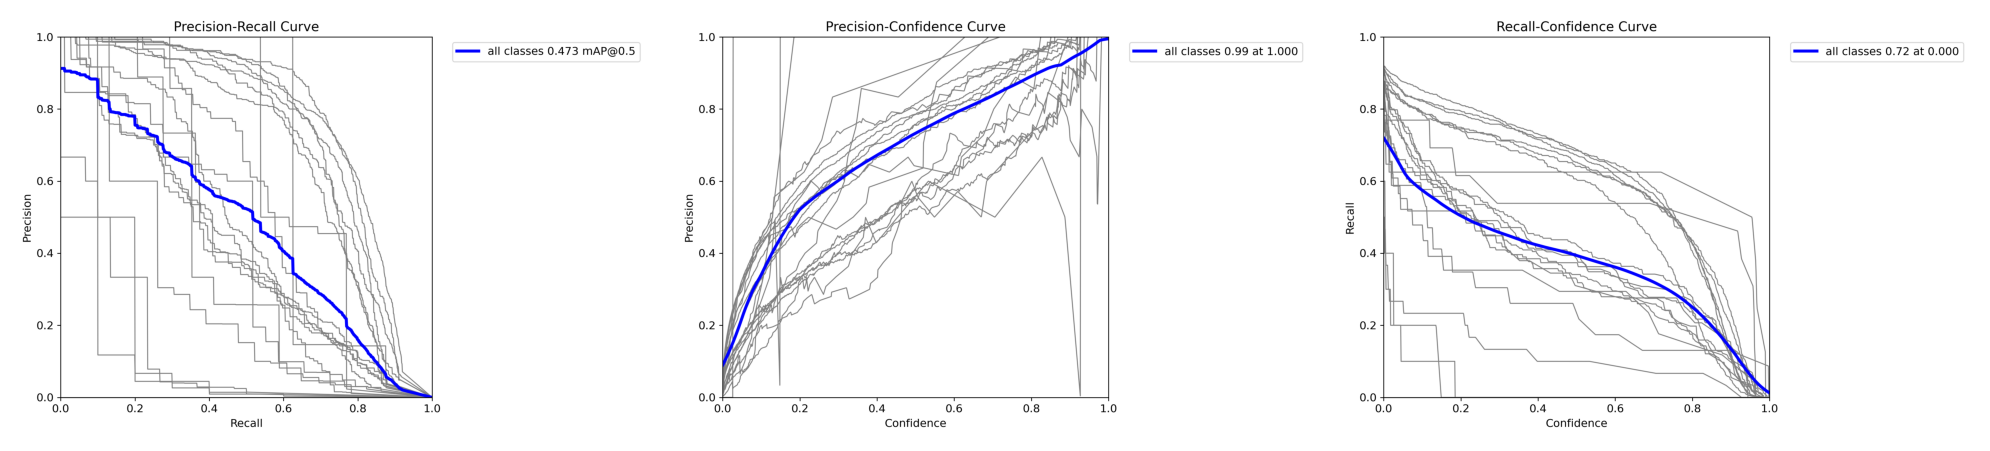

In [ ]:
# showing PR_curve,P_curve , R_curve
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(plt.imread(m_results/"PR_curve.png"))
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(plt.imread(m_results/"P_curve.png"))
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(plt.imread(m_results/"R_curve.png"))
plt.axis("off")

plt.tight_layout()
plt.show()

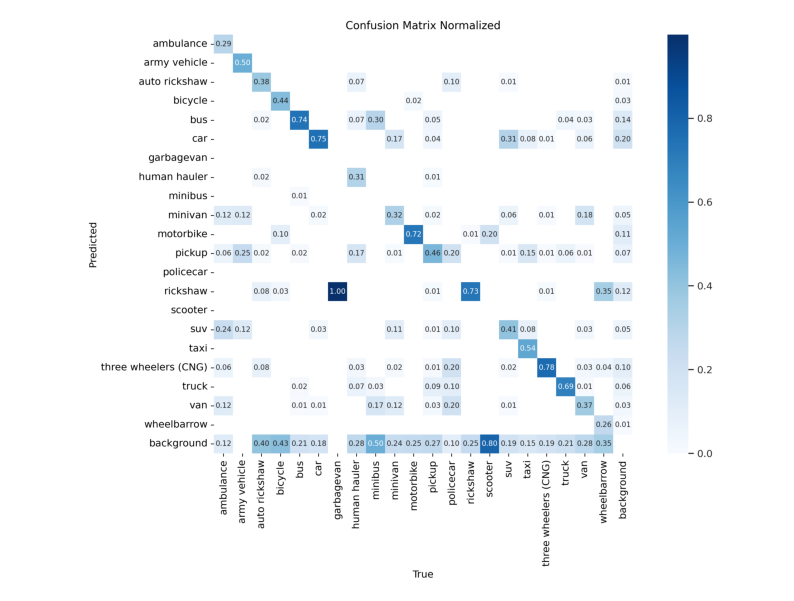

In [ ]:
# show confusion_matrix norm

plt.figure(figsize=(10,10))
plt.imshow(plt.imread(m_results/"confusion_matrix_normalized.png"))
plt.axis("off")
plt.show()

In [ ]:
#now read result_csv and show losses within model training

results=pd.read_csv(m_results/"results.csv")
results.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,99.3741,1.71778,2.52418,1.50917,0.20123,0.07523,0.00933,0.00459,2.34855,25.18280,2.32926,0.070199,0.003311,0.003311
1,2,200.5590,1.77924,2.37357,1.57066,0.30799,0.05802,0.04206,0.02180,1.96203,6.00395,1.86280,0.040132,0.006578,0.006578
2,3,305.0550,1.70815,2.24043,1.53582,0.43942,0.09675,0.08827,0.04714,1.83169,2.50664,1.71020,0.009999,0.009778,0.009778
3,4,409.5760,1.65344,2.09864,1.49658,0.44823,0.13040,0.08807,0.04632,1.65715,4.94012,1.52392,0.009700,0.009700,0.009700
4,5,509.2410,1.60759,1.98905,1.46949,0.59311,0.13758,0.14907,0.08673,1.62182,2.10016,1.50603,0.009600,0.009600,0.009600


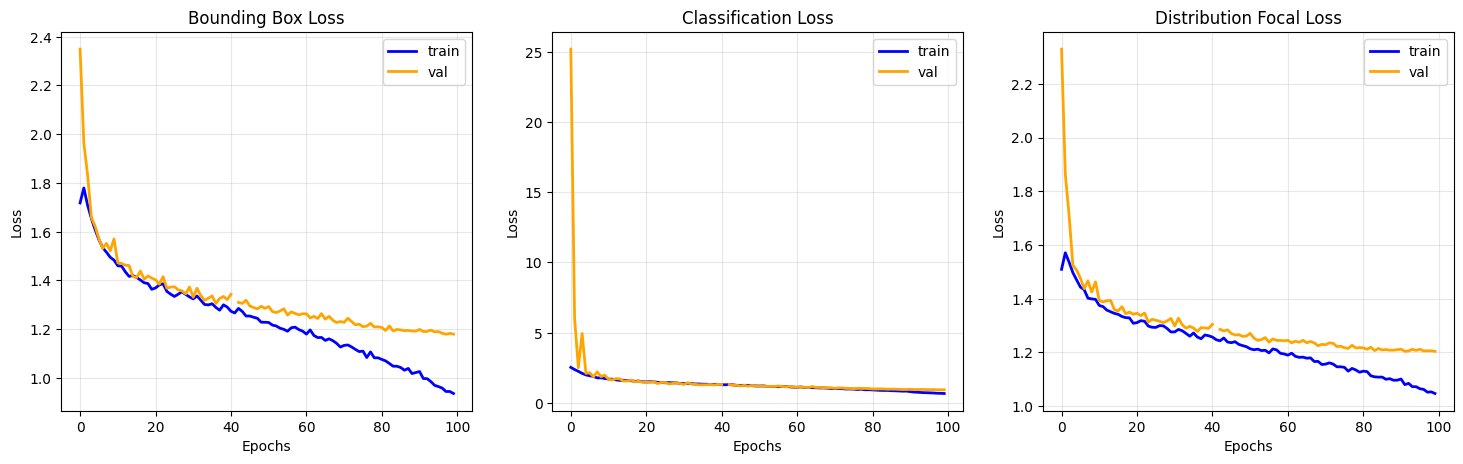

In [ ]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(results["train/box_loss"], label="train", color='blue', linewidth=2)
plt.plot(results["val/box_loss"], label="val", color='orange', linewidth=2)
plt.title('Bounding Box Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(results["train/cls_loss"], label="train", color='blue', linewidth=2)
plt.plot(results["val/cls_loss"], label="val", color='orange', linewidth=2)
plt.title('Classification Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(results["train/dfl_loss"], label="train", color='blue', linewidth=2)
plt.plot(results["val/dfl_loss"], label="val", color='orange', linewidth=2)
plt.title('Distribution Focal Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout(pad=2.0)
plt.show()

## fintune and enhance model performance

In [10]:
# first load best model wieghts

model = YOLO("/content/drive/MyDrive/Traffic_Monetoring/traffic_monitoring/yolov8m_run/weights/best.pt")

In [11]:
results = model.train(
    data="data.yaml",
    epochs=50,
    batch=16,
    imgsz=640,
    workers=4,

    # Learning Rate Schedule
    lr0=0.001,
    lrf=0.00005,
    warmup_epochs=1,

    # Augmentations
    augment=True,
    degrees=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.1,

    # Advanced Settings
    optimizer='Adam',
    weight_decay=0.0005,
    amp=True,

    # Early Stopping
    patience=15,

    # Output
    project="traffic_monitoring",
    name="yolov8m_run_finetune",
    exist_ok=True
)


Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=5e-05, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=/content/drive/MyDrive/Traffic_Monetoring/traffic_monitoring/yolov8m_run/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_run_finetune, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_m

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.7±0.1 ms, read: 0.3±0.3 MB/s, size: 144.4 KB)


train: Scanning /content/drive/.shortcut-targets-by-id/1WXSeespLo6J9ZRcWwHOUYEhPj8ProJQu/Traffic_Monetoring/data_yolo/labels/train... 2403 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2403/2403 [19:25<00:00,  2.06it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1WXSeespLo6J9ZRcWwHOUYEhPj8ProJQu/Traffic_Monetoring/data_yolo/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.1±0.5 ms, read: 0.2±0.2 MB/s, size: 90.2 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1WXSeespLo6J9ZRcWwHOUYEhPj8ProJQu/Traffic_Monetoring/data_yolo/labels/val... 597 images, 0 backgrounds, 0 corrupt: 100%|██████████| 597/597 [03:59<00:00,  2.49it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1WXSeespLo6J9ZRcWwHOUYEhPj8ProJQu/Traffic_Monetoring/data_yolo/labels/val.cache
Plotting labels to traffic_monitoring/yolov8m_run_finetune/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to traffic_monitoring/yolov8m_run_finetune
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.73G      1.158      1.051      1.187         55        640: 100%|██████████| 151/151 [02:28<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:16<00:00,  1.12it/s]

                   all        597       5024      0.612      0.427      0.458      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.28G      1.123     0.9885      1.165         45        640: 100%|██████████| 151/151 [01:46<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.43it/s]

                   all        597       5024      0.666      0.418      0.462      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.99G      1.104      0.969      1.153         59        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]


                   all        597       5024      0.712      0.419      0.465      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.15G      1.107     0.9637      1.152         34        640: 100%|██████████| 151/151 [01:52<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:15<00:00,  1.23it/s]


                   all        597       5024      0.648      0.424      0.461      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         7G      1.091     0.9408      1.145         59        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        597       5024      0.661      0.427      0.456      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.25G      1.089     0.9435      1.148         16        640: 100%|██████████| 151/151 [01:49<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]

                   all        597       5024      0.692      0.413      0.463      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.18G      1.093     0.9448      1.146         38        640: 100%|██████████| 151/151 [01:47<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.48it/s]

                   all        597       5024      0.702      0.406      0.465      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.04G      1.088     0.9437      1.145         42        640: 100%|██████████| 151/151 [01:48<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]

                   all        597       5024      0.781      0.384      0.472      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.91G      1.083     0.9304      1.141         50        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.48it/s]

                   all        597       5024       0.65      0.416      0.429      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.23G      1.086     0.9354      1.144         67        640: 100%|██████████| 151/151 [01:51<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.46it/s]

                   all        597       5024      0.678      0.422      0.463      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.27G      1.079     0.9198      1.131        118        640: 100%|██████████| 151/151 [01:51<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]

                   all        597       5024      0.578      0.457      0.474      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.25G      1.069     0.9141      1.127         58        640: 100%|██████████| 151/151 [01:53<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.59it/s]


                   all        597       5024      0.666      0.428      0.476      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.55G      1.072      0.913      1.135         23        640: 100%|██████████| 151/151 [01:52<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        597       5024      0.701      0.427      0.463      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.22G      1.061     0.8972      1.123        115        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.51it/s]


                   all        597       5024      0.682      0.422       0.47      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.03G      1.057     0.9027      1.127         41        640: 100%|██████████| 151/151 [01:48<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.45it/s]

                   all        597       5024      0.706      0.413       0.47      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.82G      1.058     0.9058      1.133         35        640: 100%|██████████| 151/151 [01:47<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.40it/s]

                   all        597       5024      0.688      0.413      0.468      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.17G      1.065     0.9061      1.129         44        640: 100%|██████████| 151/151 [01:48<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.57it/s]

                   all        597       5024      0.759      0.406      0.481      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.06G      1.056     0.8815      1.123         59        640: 100%|██████████| 151/151 [01:51<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.43it/s]

                   all        597       5024      0.678      0.439      0.457      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.77G      1.055     0.8928      1.124         43        640: 100%|██████████| 151/151 [01:47<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.48it/s]

                   all        597       5024      0.709      0.417      0.469      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.79G       1.06     0.8929      1.124         13        640: 100%|██████████| 151/151 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.51it/s]

                   all        597       5024       0.71      0.419      0.474      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.25G      1.053     0.8808      1.123         17        640: 100%|██████████| 151/151 [01:47<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.47it/s]

                   all        597       5024      0.718      0.418      0.474      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.66G       1.04     0.8756      1.116         92        640: 100%|██████████| 151/151 [01:46<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.61it/s]


                   all        597       5024      0.676      0.427      0.468      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.03G      1.061     0.8932      1.128         61        640: 100%|██████████| 151/151 [01:48<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]

                   all        597       5024      0.672      0.433      0.479      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.68G      1.033     0.8709      1.108         66        640: 100%|██████████| 151/151 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.36it/s]

                   all        597       5024       0.76      0.404       0.47      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.72G      1.048     0.8723      1.117         58        640: 100%|██████████| 151/151 [01:50<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:15<00:00,  1.20it/s]


                   all        597       5024      0.689      0.427      0.473      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.89G      1.025     0.8512      1.106         30        640: 100%|██████████| 151/151 [01:47<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        597       5024      0.673      0.433      0.477      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.94G      1.047     0.8702      1.121         47        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.52it/s]


                   all        597       5024      0.688      0.434      0.481      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.95G      1.036      0.865      1.108         82        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.42it/s]

                   all        597       5024      0.728      0.423      0.486      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.41G      1.042     0.8693      1.122         31        640: 100%|██████████| 151/151 [01:50<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]

                   all        597       5024      0.683      0.443      0.488      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.29G      1.034      0.868      1.112        168        640: 100%|██████████| 151/151 [01:51<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]

                   all        597       5024      0.701      0.441      0.485      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.74G      1.025     0.8381      1.102        120        640: 100%|██████████| 151/151 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.57it/s]


                   all        597       5024      0.736      0.424      0.487      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.43G      1.022     0.8561      1.103         51        640: 100%|██████████| 151/151 [01:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.48it/s]

                   all        597       5024      0.733      0.425      0.488      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.88G      1.022     0.8422      1.107         57        640: 100%|██████████| 151/151 [01:50<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.49it/s]

                   all        597       5024      0.764      0.419      0.492      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.25G      1.019     0.8357      1.106         48        640: 100%|██████████| 151/151 [01:52<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.49it/s]

                   all        597       5024      0.723      0.418      0.494      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.12G      1.026     0.8426        1.1         52        640: 100%|██████████| 151/151 [01:53<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.46it/s]


                   all        597       5024      0.735      0.426      0.495      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.67G      1.011     0.8262      1.101         89        640: 100%|██████████| 151/151 [01:50<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.51it/s]

                   all        597       5024      0.746      0.427      0.494      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.97G      1.024     0.8371      1.102         49        640: 100%|██████████| 151/151 [01:50<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.55it/s]


                   all        597       5024       0.72      0.418      0.489      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.31G      1.019     0.8283      1.094         39        640: 100%|██████████| 151/151 [01:47<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.43it/s]

                   all        597       5024       0.77       0.42      0.489      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       7.4G      1.021     0.8368      1.103         40        640: 100%|██████████| 151/151 [01:45<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.44it/s]

                   all        597       5024      0.702      0.431      0.491      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.87G      1.014     0.8372      1.101        119        640: 100%|██████████| 151/151 [01:49<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.54it/s]


                   all        597       5024      0.723      0.436      0.495      0.325
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       6.6G     0.9271     0.6692      1.039         18        640: 100%|██████████| 151/151 [01:39<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.48it/s]

                   all        597       5024      0.666      0.439      0.476      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.47G       0.91     0.6373      1.029         13        640: 100%|██████████| 151/151 [01:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.60it/s]

                   all        597       5024      0.718      0.422      0.485      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.67G     0.9003     0.6268      1.026         19        640: 100%|██████████| 151/151 [01:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.51it/s]

                   all        597       5024      0.698      0.441      0.484      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.72G     0.9007      0.619       1.02         32        640: 100%|██████████| 151/151 [01:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.54it/s]

                   all        597       5024      0.734      0.419      0.483       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.58G     0.8878     0.6127      1.021         25        640: 100%|██████████| 151/151 [01:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.62it/s]


                   all        597       5024      0.704      0.431      0.494       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.64G     0.8883     0.6097      1.016         15        640: 100%|██████████| 151/151 [01:41<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.47it/s]

                   all        597       5024       0.72      0.432      0.494      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.62G     0.8895     0.6022      1.014         30        640: 100%|██████████| 151/151 [01:38<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.51it/s]

                   all        597       5024      0.736      0.428      0.489      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.79G     0.8842     0.6024      1.021         32        640: 100%|██████████| 151/151 [01:34<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.52it/s]

                   all        597       5024      0.727      0.428      0.495      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.34G     0.8792     0.6007      1.009         15        640: 100%|██████████| 151/151 [01:43<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]

                   all        597       5024      0.742      0.425      0.494      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.94G     0.8821     0.5987      1.013         76        640: 100%|██████████| 151/151 [01:39<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:12<00:00,  1.50it/s]


                   all        597       5024      0.739       0.42      0.494      0.328

50 epochs completed in 1.715 hours.
Optimizer stripped from traffic_monitoring/yolov8m_run_finetune/weights/last.pt, 52.0MB
Optimizer stripped from traffic_monitoring/yolov8m_run_finetune/weights/best.pt, 52.0MB

Validating traffic_monitoring/yolov8m_run_finetune/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,851,919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:20<00:00,  1.06s/it]


                   all        597       5024      0.739      0.417      0.487      0.331
             ambulance         17         17      0.825       0.28      0.378      0.243
          army vehicle          7          8      0.901      0.625      0.679      0.611
         auto rickshaw         35        104      0.858      0.375      0.593      0.352
               bicycle         64         91      0.536      0.385      0.407      0.189
                   bus        315        661      0.762      0.679      0.751      0.511
                   car        336       1200      0.799      0.681      0.766      0.531
            garbagevan          1          1          1          0          0          0
          human hauler         25         29      0.778      0.482      0.492      0.355
               minibus         13         30      0.417      0.133      0.174      0.103
               minivan        118        220      0.554      0.373      0.451      0.327
             motorbik

In [36]:
m_results = Path("/content/drive/MyDrive/Traffic_Monetoring/traffic_monitoring/yolov8m_run_finetune")
print (results)

/content/drive/MyDrive/Traffic_Monetoring/traffic_monitoring/yolov8m_run_finetune


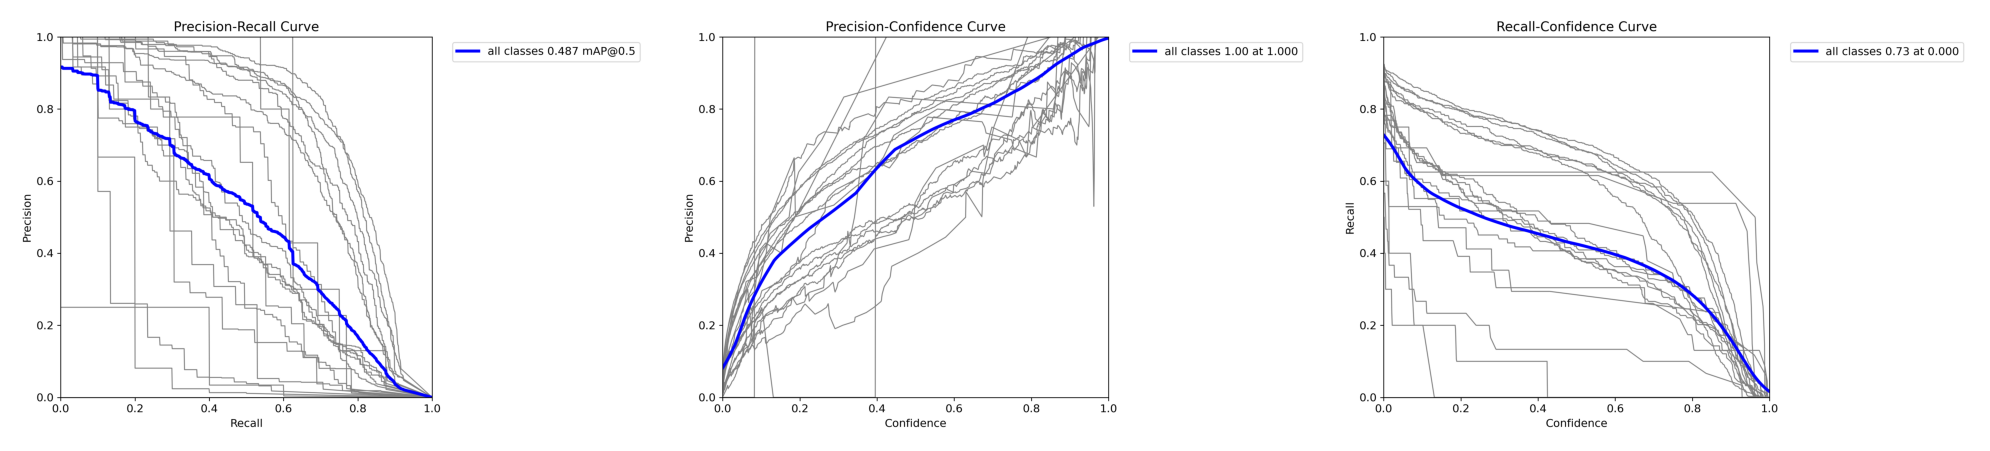

In [37]:
# showing PR_curve,P_curve , R_curve
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(plt.imread(m_results/"PR_curve.png"))
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(plt.imread(m_results/"P_curve.png"))
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(plt.imread(m_results/"R_curve.png"))
plt.axis("off")

plt.tight_layout()
plt.show()

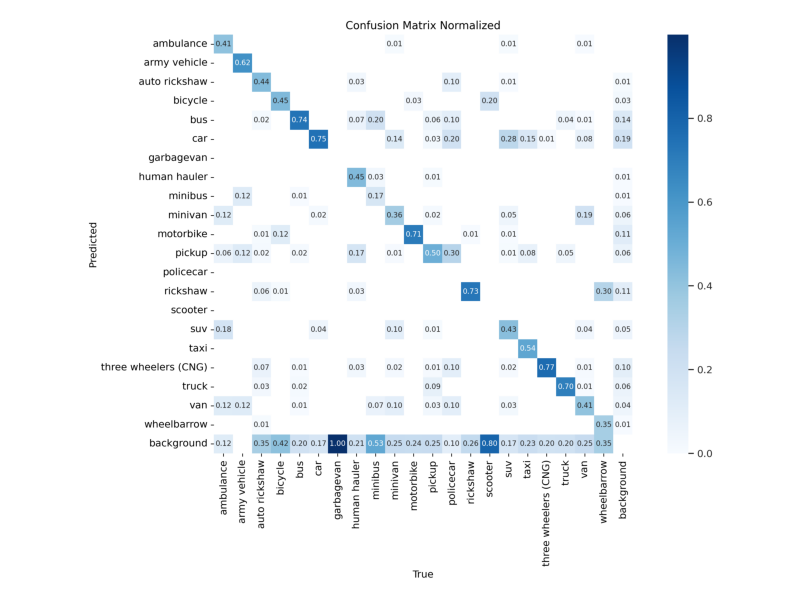

In [38]:
# show confusion_matrix norm

plt.figure(figsize=(10,10))
plt.imshow(plt.imread(m_results/"confusion_matrix_normalized.png"))
plt.axis("off")
plt.show()

In [39]:
#now read result_csv and show losses within model training

results=pd.read_csv(m_results/"results.csv")
results.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,165.784,1.15773,1.05051,1.18666,0.61209,0.42684,0.45774,0.30070,1.18310,0.96698,1.20177,0.001656,0.000993,0.000993
1,2,287.710,1.12263,0.98851,1.16538,0.66644,0.41832,0.46164,0.29892,1.19108,0.94763,1.20773,0.000980,0.000980,0.000980
2,3,416.641,1.10441,0.96896,1.15299,0.71249,0.41907,0.46452,0.30177,1.19685,0.95434,1.21483,0.000960,0.000960,0.000960
3,4,546.985,1.10705,0.96370,1.15206,0.64810,0.42407,0.46138,0.30444,1.18548,0.95320,1.20746,0.000940,0.000940,0.000940
4,5,676.553,1.09112,0.94078,1.14476,0.66091,0.42739,0.45587,0.30067,1.17614,0.95798,1.19675,0.000920,0.000920,0.000920


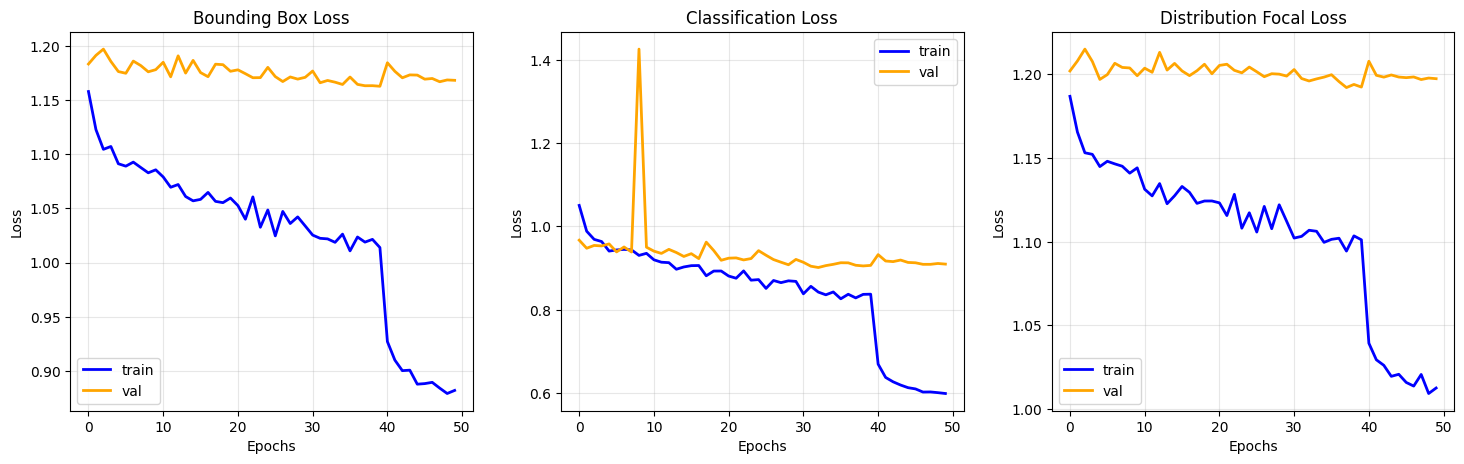

In [41]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(results["train/box_loss"], label="train", color='blue', linewidth=2)
plt.plot(results["val/box_loss"], label="val", color='orange', linewidth=2)
plt.title('Bounding Box Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(results["train/cls_loss"], label="train", color='blue', linewidth=2)
plt.plot(results["val/cls_loss"], label="val", color='orange', linewidth=2)
plt.title('Classification Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(results["train/dfl_loss"], label="train", color='blue', linewidth=2)
plt.plot(results["val/dfl_loss"], label="val", color='orange', linewidth=2)
plt.title('Distribution Focal Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout(pad=2.0)
plt.show()